In [5]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import cv2 
import os

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [5]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    'Covid Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 392 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    'Covid Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 392 images belonging to 2 classes.


In [10]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 86s 11s/step - loss: 1.3744 - accuracy: 0.5647 - val_loss: 0.6996 - val_accuracy: 0.5156
Epoch 2/10
8/8 [==============================] - 78s 10s/step - loss: 0.7093 - accuracy: 0.5820 - val_loss: 0.6747 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 80s 10s/step - loss: 0.6303 - accuracy: 0.6289 - val_loss: 0.5521 - val_accuracy: 0.9219
Epoch 4/10
8/8 [==============================] - 78s 10s/step - loss: 0.4758 - accuracy: 0.7888 - val_loss: 0.3778 - val_accuracy: 0.9219
Epoch 5/10
8/8 [==============================] - 69s 9s/step - loss: 0.3127 - accuracy: 0.9052 - val_loss: 0.2293 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 71s 9s/step - loss: 0.3316 - accuracy: 0.8664 - val_loss: 0.2465 - val_accuracy: 0.9062
Epoch 7/10
8/8 [==============================] - 77s 10s/step - loss: 0.2596 - accuracy: 0.

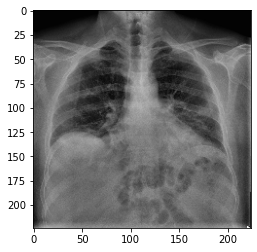

Covid


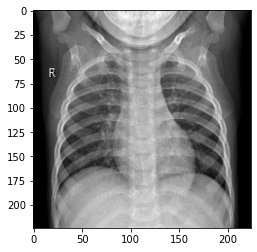

No Covid


In [11]:
dir_path="Covid Dataset/Test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val == 0:
        print("Covid")
    else:
        print("No Covid")